
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Learning Objectives

At the end of the experiment, you will be able to :
* Understand the VGG16 pre-trained model to classify flowers photos

In [ ]:
#@title Explanation Video
from IPython.display import HTML

HTML("""<video width="854" and height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/B18_Walkthrough.mp4" type="video/mp4">
</video>
""")

### Dataset

#### Description


The flowers dataset consists of 3670 samples images of flowers with 5 possible class labels.  

Each image is with range of 0-255 RGB Value.

The dataset comprises 5 flowers:


    daisy
    dandelion
    roses
    sunflowers
    tulips

#### VGG16

The VGG16- convolutional network, is trained on ImageNet dataset (1000 classes) which is capable of extracting features from an image and train its fully connected network in order to classify different types of retinal damage instead of objects.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2420495" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9041755651" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U4W19_62_VGG16_pre_trained_model_FlowerClassification_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    ipython.magic("sx pip install Pillow")
    ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/flowerphotos.zip")
    ipython.magic("sx unzip -qq flowerphotos.zip")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### 1. Importing the required packages

In [4]:
import numpy as np
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import random_split
import torch.optim as optim
import matplotlib.pyplot as plt

### 2. Data Loading and Pre-processing

In [5]:
# Specify root data directory
data_dir1 = '/content/flower_photos'

for dirname, _, filenames in os.walk(data_dir1):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/flower_photos/sunflowers/2067882323_8de6623ffd.jpg
/content/flower_photos/sunflowers/9564240106_0577e919da_n.jpg
/content/flower_photos/sunflowers/14121915990_4b76718077_m.jpg
/content/flower_photos/sunflowers/4626721387_88f89d5cc9_n.jpg
/content/flower_photos/sunflowers/3466923719_b4b6df7f8b_n.jpg
/content/flower_photos/sunflowers/1240624822_4111dde542.jpg
/content/flower_photos/sunflowers/1419608016_707b887337_n.jpg
/content/flower_photos/sunflowers/6482016439_b0d06dac04.jpg
/content/flower_photos/sunflowers/15839183375_49bf4f75e8_m.jpg
/content/flower_photos/sunflowers/2442985637_8748180f69.jpg
/content/flower_photos/sunflowers/6606743797_c90c669757.jpg
/content/flower_photos/sunflowers/9904127656_f76a5a4811_m.jpg
/content/flower_photos/sunflowers/6606741847_f0198d83ff.jpg
/content/flower_photos/sunflowers/20183071136_c297e74fcc_m.jpg
/content/flower_photos/sunflowers/14741813010_5d44e33088_n.jpg
/content/flower_photos/sunflowers/1044296388_912143e1d4.jpg
/content/flower_ph

In [6]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

transformer = transforms.Compose([transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),   # Resize the image to 224×224 pixels.
                                  transforms.ToTensor()])                       # Convert the image to PyTorch Tensor

# Loading the data
database = datasets.ImageFolder(data_dir1, transform=transformer)

In [7]:
# Print the classes
database.classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [8]:
# Mapping the name of the class to index
database.class_to_idx

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [9]:
# splitting the database into training and validation set
validation_size = 734
training_size = len(database) - validation_size

In [10]:
# random_split: Randomly split a dataset into non-overlapping new datasets of given lengths.
train_ds, val_ds_main = random_split(database,[training_size, validation_size])
len(train_ds), len(val_ds_main)

(2936, 734)

In [11]:
batch_size =50

# Load the data. utils.dataloader is a package for loading the dataset
train_dl = torch.utils.data.DataLoader(train_ds, batch_size)
val_dl = torch.utils.data.DataLoader(val_ds_main,batch_size)

In [12]:
# Generate a batch of 50 images and labels
train_images, train_labels = next(iter(train_dl))
train_images.shape, train_labels.shape

(torch.Size([50, 3, 224, 224]), torch.Size([50]))

In [13]:
# Print the labels
train_labels

tensor([2, 3, 1, 4, 1, 0, 0, 0, 4, 4, 4, 2, 4, 3, 2, 3, 3, 4, 4, 1, 2, 1, 3, 4,
        1, 2, 1, 4, 0, 3, 1, 0, 2, 4, 2, 4, 1, 2, 1, 3, 1, 2, 0, 0, 4, 4, 1, 2,
        4, 2])

### 3. Plotting the sample Images

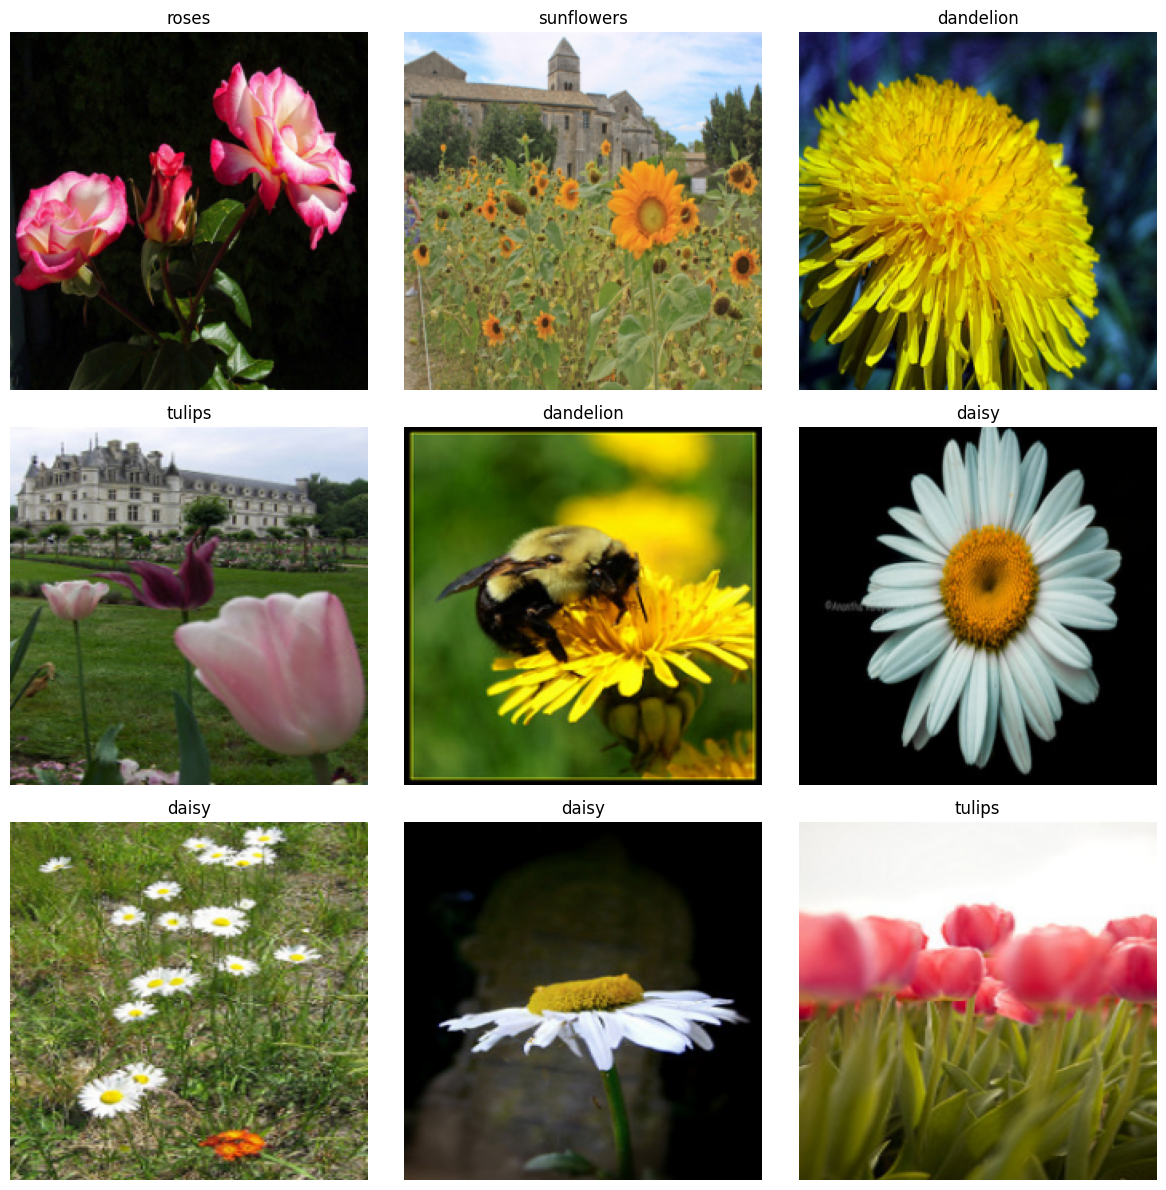

In [14]:
# Create a grid of images along with their corresponding labels
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.reshape(-1)

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i].permute(1, 2, 0))
    axes[i].set_title(database.classes[train_labels[i].item()])
    axes[i].axis('off')

plt.tight_layout()

### 4. Applying VGG16

In [15]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)
print(vgg16)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:08<00:00, 63.7MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In the last layer of the classifier the VGG-16 is able to classify 1000 different labels but you just need 5 labels instead. In order to do that replace the last fully connected layer of the model with a new one with 5 output features instead of 1000.

In PyTorch, we can access the VGG-16 classifier with model.classifier, which is an 6-layer array.



In [16]:
# Print the input features of 6th module from the classifier
num_features = vgg16.classifier[6].in_features
print(num_features)

4096


In [17]:
# Remove last layer
features = list(vgg16.classifier.children())[:-1]
print(features)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False)]


In [18]:
# Add the linear layer with 5 outputs
features.extend([nn.Linear(num_features, 5)])
print(features)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=5, bias=True)]


In [19]:
# Replace the model classifier
vgg16.classifier = nn.Sequential(*features)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

The output above is the summary of our model. Notice that the last layer has 5 output features as we have 5 ouput classes

### 5. Initializing CUDA

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### 6. Defining the Criterion and the Loss Function

In [21]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(vgg16.parameters(), lr=0.002)

vgg16 = vgg16.to(device)

### 7. Training the model


In [ ]:
# This code cell takes 20 mins to run

# No of Epochs
epoch = 5

# keeping the network in train mode
vgg16.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_dl:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Passing the data to the model (Forward Pass)
      outputs = vgg16(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(train_ds))
    train_accuracy.append(100 * correct/len(train_ds))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss:0.019796 Train Accuracy: 63.11 
epoch: 2, Train Loss:0.009613 Train Accuracy: 82.49 
epoch: 3, Train Loss:0.007248 Train Accuracy: 87.16 
epoch: 4, Train Loss:0.005683 Train Accuracy: 89.31 


### 8. Model Evaluation

In [ ]:
# Keeping the network in evaluation mode
vgg16.eval()

Test_accuracy = 0

# Iterate through all the batches in each epoch
for images,labels in val_dl:
    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass
    outputs = vgg16(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()

Accuracy = 100 * Test_accuracy / len(val_ds_main)
print("Accuracy of Test Data is", Accuracy)

### Please answer the questions below to complete the experiment:




In [ ]:
#@title State True or False: Transfer learning means transferring the knowledge of a pretrained model to a new model by initializing the second model with the first model's weights { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["","TRUE", "FALSE"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")